In [1]:
from utilities import *

I am in libs


In [2]:
%store -r x_scaled
%store -r Y

+-----------------------+--------------------------------+-------------+
| Number of Components: | Cumulative Explained Variance: | Eigenvalue: |
+-----------------------+--------------------------------+-------------+
|           1           |             0.769              |    58.041   |
|           2           |             0.824              |    4.173    |
|           3           |             0.864              |    2.988    |
|           4           |             0.886              |    1.687    |
|           5           |             0.905              |    1.456    |
|           6           |             0.921              |    1.157    |
|           7           |             0.931              |    0.806    |
|           8           |             0.939              |    0.603    |
|           9           |             0.947              |    0.554    |
|           10          |             0.953              |     0.46    |
|           11          |             0.958        

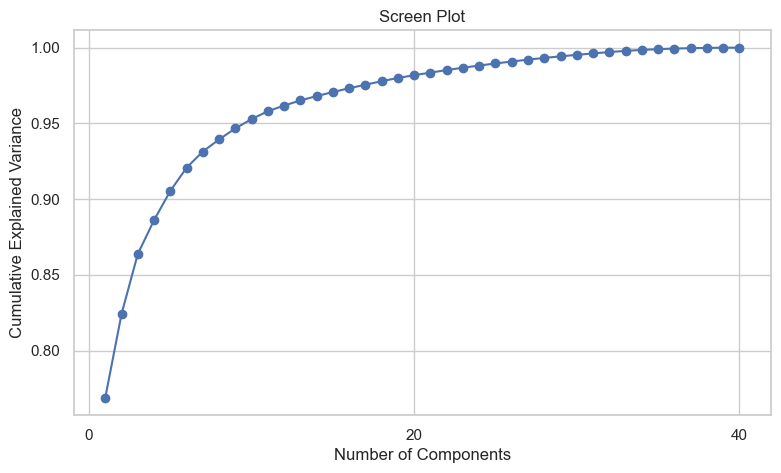

In [3]:
# Guessing less than 41 components
pca41 = PCA(n_components=40)
principalComponents = pca41.fit_transform(x_scaled)

# Creating a pretty table for results
table = [['Number of Components:','Cumulative Explained Variance:','Eigenvalue:']]
tab = PrettyTable(table[0])
for i in range(len(pca41.explained_variance_ratio_.cumsum())):
    tab.add_row([i+1,pca41.explained_variance_ratio_.cumsum()[i].round(3),
                 pca41.explained_variance_[i].round(3)])

#tab.add_rows(table[1:])
print(tab)

figure=plt.figure(figsize=(9,5))
sns.set_theme(style = "whitegrid")
plt.plot(range(1,41),pca41.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Screen Plot')
plt.locator_params(axis='x', nbins=4)

plt.grid(True)
plt.show()

The "elbow" on the Scree Plot appears to be around 6 or 7 principal components, indicating 6 or 7 components should be used. Kaiser's Rule instructs users to drop all components with eigenvalues under 1, indicating 6 components should be used.

Since 6 components explains > 93% of variance and choosing 6 or 7 components seemed abritrary, I decided to move forward with 6 components for the extra explained variance in this PCA.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y,
                                test_size = 0.2, random_state = 32, stratify=Y['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       151
           1       0.83      0.60      0.70        50

    accuracy                           0.87       201
   macro avg       0.86      0.78      0.81       201
weighted avg       0.87      0.87      0.86       201

Training Recall: 0.9603
Training Precision: 0.8788
Training F1-score: 0.9177


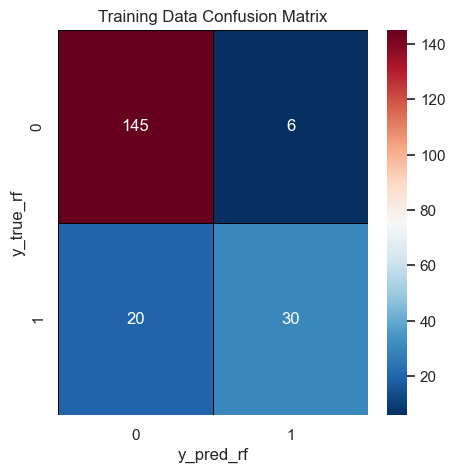

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       151
           1       0.95      0.40      0.56        50

    accuracy                           0.85       201
   macro avg       0.89      0.70      0.73       201
weighted avg       0.86      0.85      0.82       201

Training Recall: 0.9934
Training Precision: 0.8333
Training F1-score: 0.9063


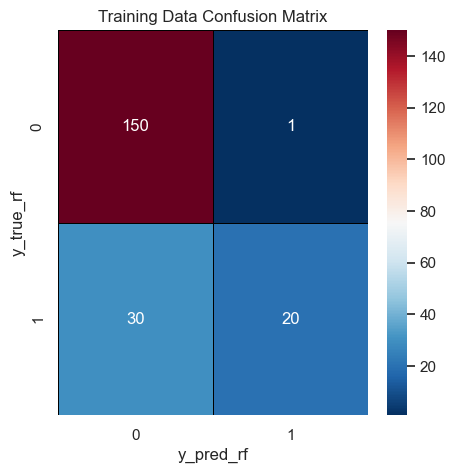

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       151
           1       0.95      0.42      0.58        50

    accuracy                           0.85       201
   macro avg       0.90      0.71      0.75       201
weighted avg       0.87      0.85      0.83       201

Training Recall: 0.9934
Training Precision: 0.838
Training F1-score: 0.9091


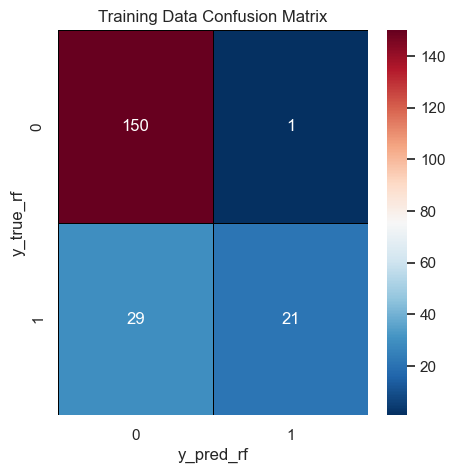

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       151
           1       0.97      0.56      0.71        50

    accuracy                           0.89       201
   macro avg       0.92      0.78      0.82       201
weighted avg       0.90      0.89      0.87       201

Training Recall: 0.9934
Training Precision: 0.8721
Training F1-score: 0.9288


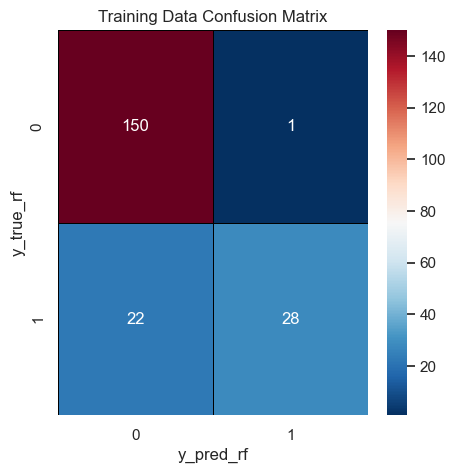

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       151
           1       0.60      0.66      0.63        50

    accuracy                           0.81       201
   macro avg       0.74      0.76      0.75       201
weighted avg       0.81      0.81      0.81       201

Training Recall: 0.8543
Training Precision: 0.8836
Training F1-score: 0.8687


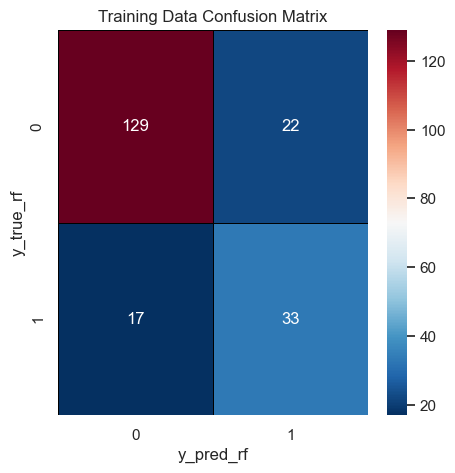

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


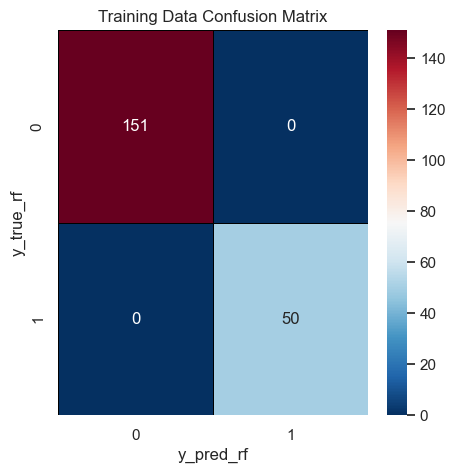

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


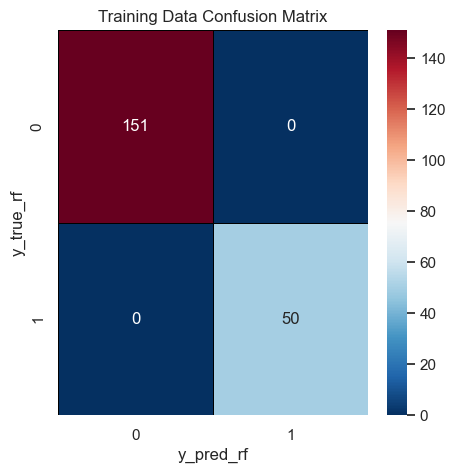

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.917700,0.906300,0.909100,0.928800,0.868700,1.000000,1.000000


In [27]:
showResult(classifiers,x_train,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.38      0.23      0.29        13

    accuracy                           0.71        51
   macro avg       0.57      0.55      0.55        51
weighted avg       0.67      0.71      0.68        51

Testing Recall: 0.8684
Testing Precision: 0.7674
Testing F1-score: 0.8148


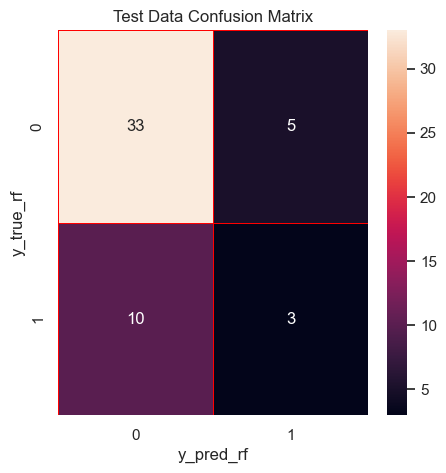

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        38
           1       0.60      0.46      0.52        13

    accuracy                           0.78        51
   macro avg       0.71      0.68      0.69        51
weighted avg       0.77      0.78      0.77        51

Testing Recall: 0.8947
Testing Precision: 0.8293
Testing F1-score: 0.8608


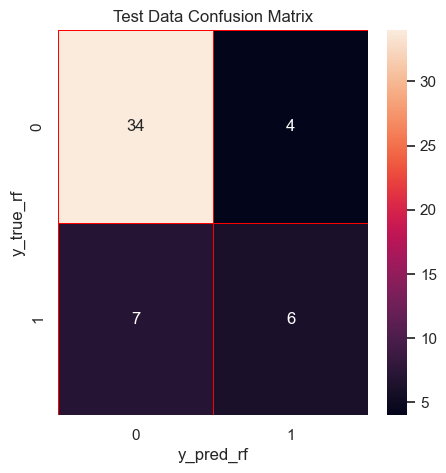

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.67      0.31      0.42        13

    accuracy                           0.78        51
   macro avg       0.73      0.63      0.64        51
weighted avg       0.77      0.78      0.75        51

Testing Recall: 0.9474
Testing Precision: 0.8
Testing F1-score: 0.8675


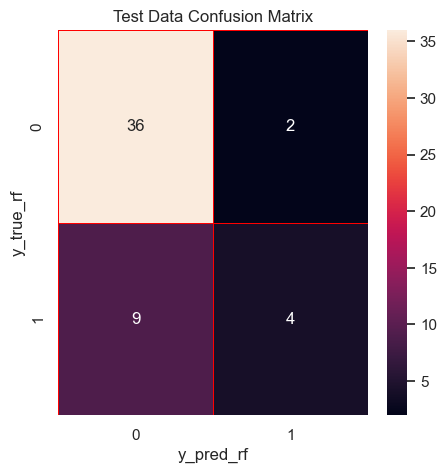

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.50      0.46      0.48        13

    accuracy                           0.75        51
   macro avg       0.66      0.65      0.66        51
weighted avg       0.74      0.75      0.74        51

Testing Recall: 0.8421
Testing Precision: 0.8205
Testing F1-score: 0.8312


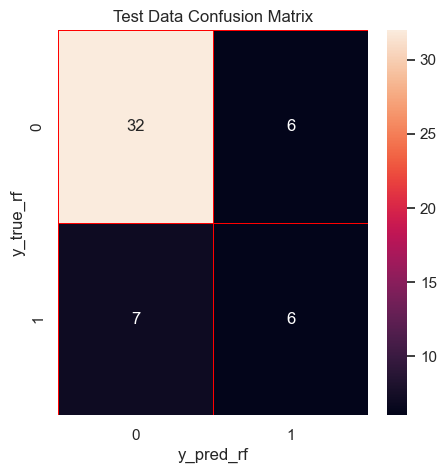

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81        38
           1       0.47      0.62      0.53        13

    accuracy                           0.73        51
   macro avg       0.66      0.69      0.67        51
weighted avg       0.76      0.73      0.74        51

Testing Recall: 0.7632
Testing Precision: 0.8529
Testing F1-score: 0.8056


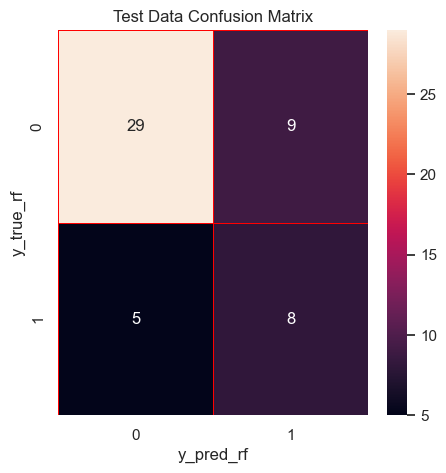

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.30      0.23      0.26        13

    accuracy                           0.67        51
   macro avg       0.53      0.52      0.52        51
weighted avg       0.64      0.67      0.65        51

Testing Recall: 0.8158
Testing Precision: 0.7561
Testing F1-score: 0.7848


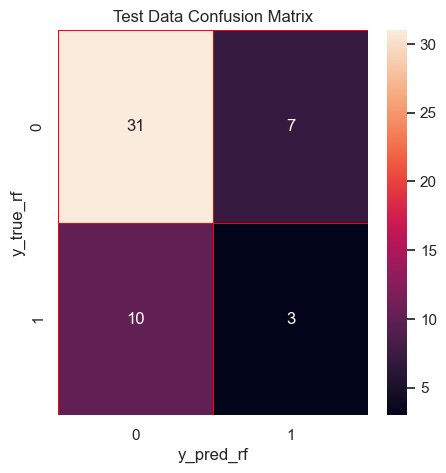

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        38
           1       0.70      0.54      0.61        13

    accuracy                           0.82        51
   macro avg       0.78      0.73      0.75        51
weighted avg       0.81      0.82      0.82        51

Testing Recall: 0.9211
Testing Precision: 0.8537
Testing F1-score: 0.8861


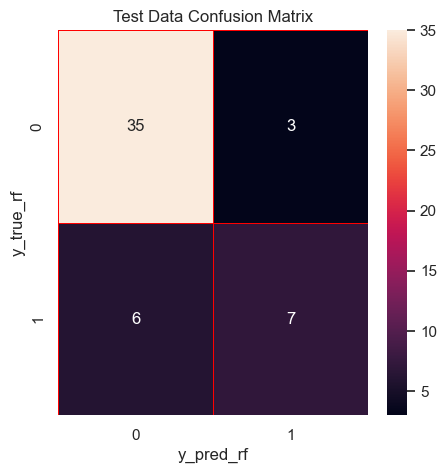

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.814800,0.860800,0.867500,0.831200,0.805600,0.784800,0.886100


In [28]:
showResult(classifiers,x_train,y_train['mortalité à un an'],test=[x_test,y_test['mortalité à un an']])

# Without any dimensionality reduction, only tw models gave an accuracy on test data set higher than 85%, KNeighborsClassifier:86.08% and	SVC:86.75%. This are the models we can tune to get the best result

In [29]:
pca6 = PCA(n_components=6)
pca_columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6']

# Transforming both x_train and x_test into PCA versions.
x_train_pca = pd.DataFrame(pca6.fit_transform(x_train), columns = pca_columns)
x_test_pca = pd.DataFrame(pca6.transform(x_test), columns = pca_columns)

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       151
           1       0.63      0.34      0.44        50

    accuracy                           0.79       201
   macro avg       0.72      0.64      0.65       201
weighted avg       0.77      0.79      0.76       201

Training Recall: 0.9338
Training Precision: 0.8103
Training F1-score: 0.8677


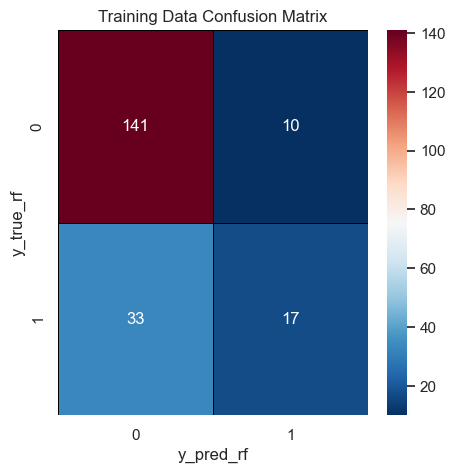

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       151
           1       0.85      0.44      0.58        50

    accuracy                           0.84       201
   macro avg       0.84      0.71      0.74       201
weighted avg       0.84      0.84      0.82       201

Training Recall: 0.9735
Training Precision: 0.84
Training F1-score: 0.9018


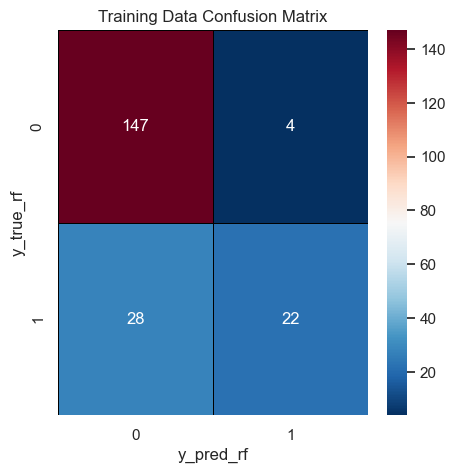

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       151
           1       0.95      0.36      0.52        50

    accuracy                           0.84       201
   macro avg       0.89      0.68      0.71       201
weighted avg       0.85      0.84      0.81       201

Training Recall: 0.9934
Training Precision: 0.8242
Training F1-score: 0.9009


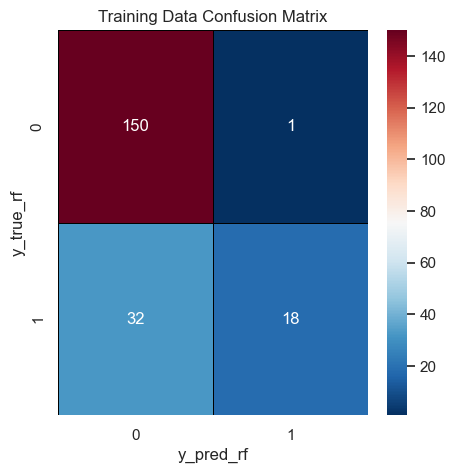

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       151
           1       0.89      0.34      0.49        50

    accuracy                           0.83       201
   macro avg       0.86      0.66      0.69       201
weighted avg       0.84      0.83      0.79       201

Training Recall: 0.9868
Training Precision: 0.8187
Training F1-score: 0.8949


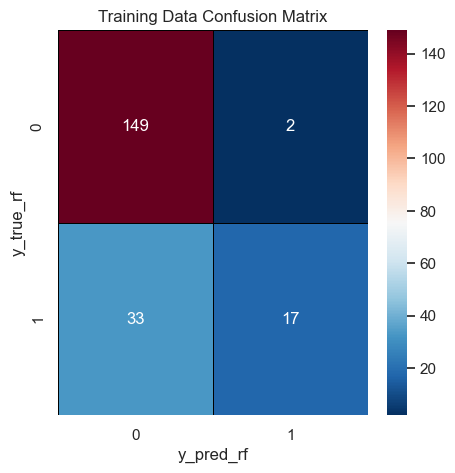

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       151
           1       0.70      0.42      0.53        50

    accuracy                           0.81       201
   macro avg       0.77      0.68      0.70       201
weighted avg       0.80      0.81      0.79       201

Training Recall: 0.9404
Training Precision: 0.8304
Training F1-score: 0.882


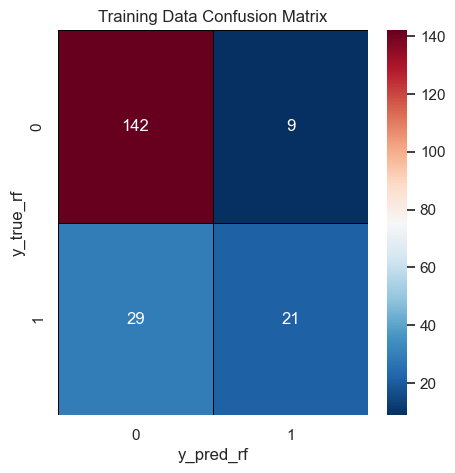

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


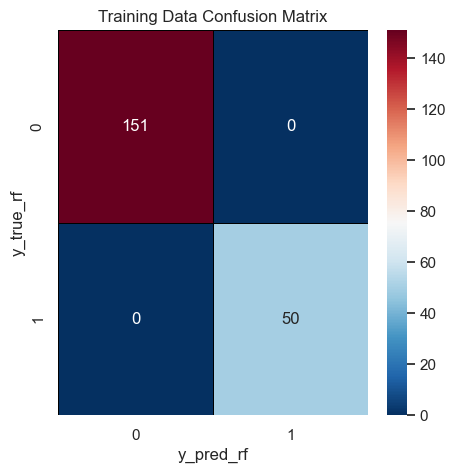

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


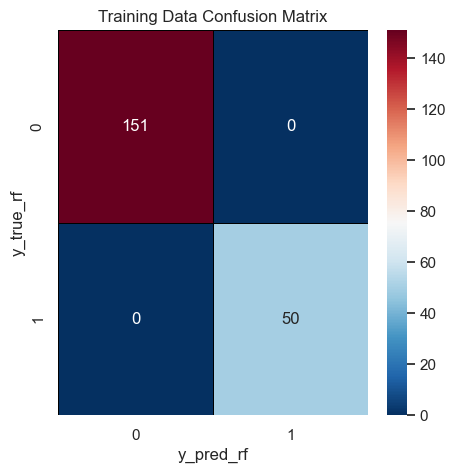

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.867700,0.901800,0.900900,0.894900,0.882000,1.000000,1.000000


In [30]:
showResult(classifiers,x_train_pca,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        38
           1       0.50      0.31      0.38        13

    accuracy                           0.75        51
   macro avg       0.65      0.60      0.61        51
weighted avg       0.72      0.75      0.72        51

Testing Recall: 0.8947
Testing Precision: 0.7907
Testing F1-score: 0.8395


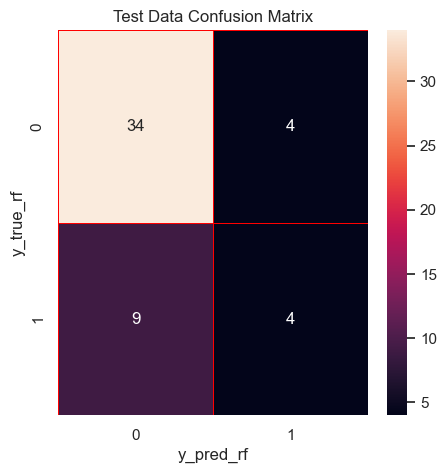

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.64      0.54      0.58        13

    accuracy                           0.80        51
   macro avg       0.74      0.72      0.73        51
weighted avg       0.80      0.80      0.80        51

Testing Recall: 0.8947
Testing Precision: 0.85
Testing F1-score: 0.8718


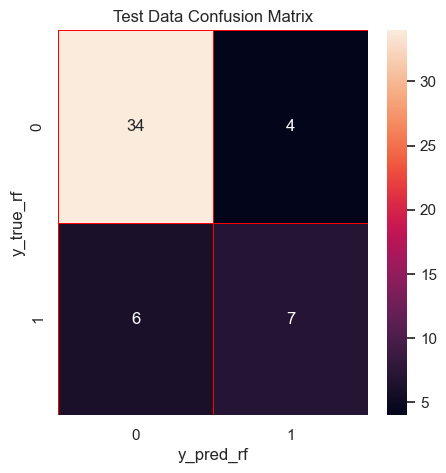

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Testing Recall: 0.9737
Testing Precision: 0.8222
Testing F1-score: 0.8916


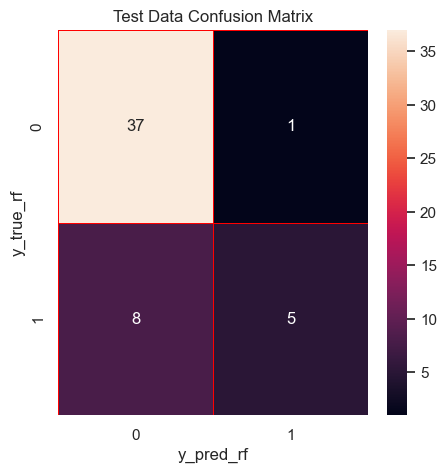

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        38
           1       0.50      0.62      0.55        13

    accuracy                           0.75        51
   macro avg       0.68      0.70      0.69        51
weighted avg       0.77      0.75      0.75        51

Testing Recall: 0.7895
Testing Precision: 0.8571
Testing F1-score: 0.8219


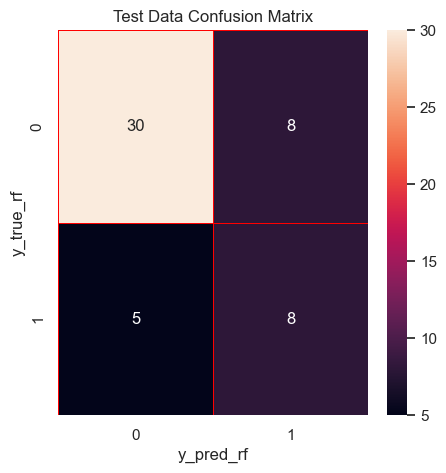

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        38
           1       0.50      0.38      0.43        13

    accuracy                           0.75        51
   macro avg       0.65      0.63      0.64        51
weighted avg       0.73      0.75      0.73        51

Testing Recall: 0.8684
Testing Precision: 0.8049
Testing F1-score: 0.8354


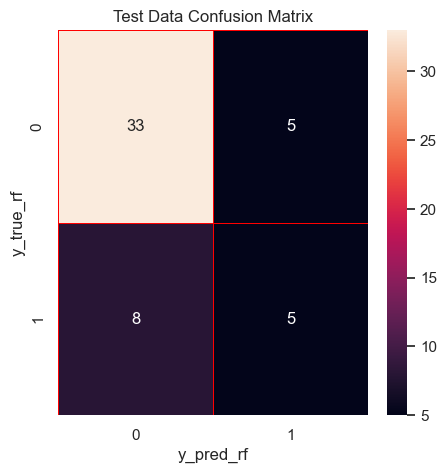

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        38
           1       0.41      0.54      0.47        13

    accuracy                           0.69        51
   macro avg       0.62      0.64      0.62        51
weighted avg       0.72      0.69      0.70        51

Testing Recall: 0.7368
Testing Precision: 0.8235
Testing F1-score: 0.7778


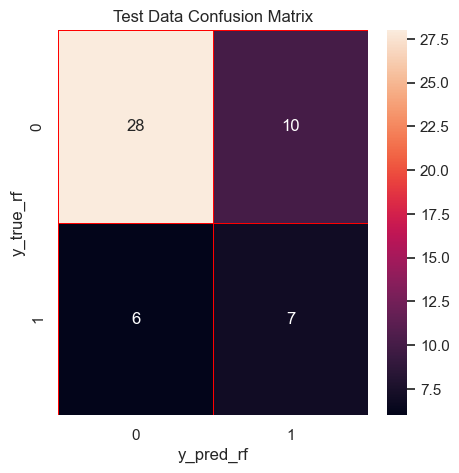

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Testing Recall: 0.9737
Testing Precision: 0.8222
Testing F1-score: 0.8916


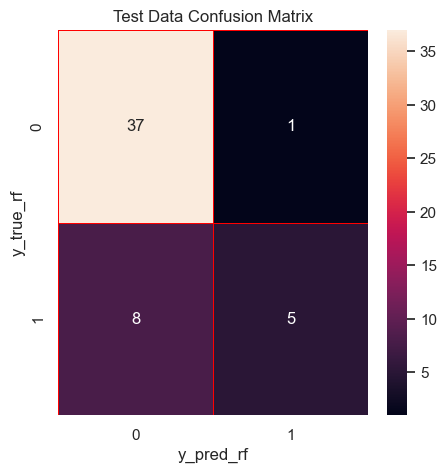

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.839500,0.871800,0.891600,0.821900,0.835400,0.777800,0.891600


In [38]:
showResult(classifiers,x_train_pca,y_train['mortalité à un an'],test=[x_test_pca,y_test['mortalité à un an']])

In [32]:
#The best model is SVC with 90.24 and Logistic regression

# PCA + TDA + machine

In [39]:
metrics=["bottleneck", "wasserstein", "landscape", "betti", "heat", "silhouette", "persistence_image"]

In [40]:
x_train_tda = tda_tranform(metrics,x_train_pca.to_numpy())
x_test_tda = tda_tranform(metrics,x_test_pca.to_numpy())

__________________________________________________
--------------------------------------------------
Results for: LogisticRegression
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       151
           1       0.80      0.24      0.37        50

    accuracy                           0.80       201
   macro avg       0.80      0.61      0.62       201
weighted avg       0.80      0.80      0.75       201

Training Recall: 0.9801
Training Precision: 0.7957
Training F1-score: 0.8783


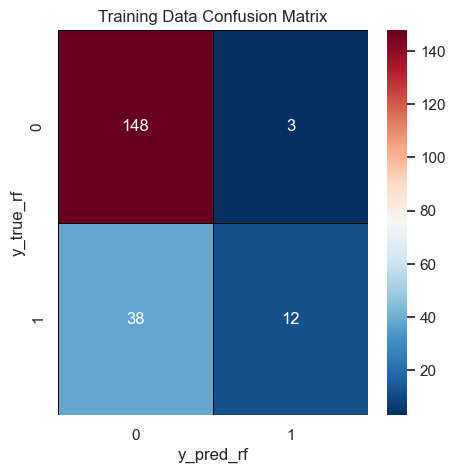

__________________________________________________
--------------------------------------------------
Results for: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       151
           1       0.75      0.42      0.54        50

    accuracy                           0.82       201
   macro avg       0.79      0.69      0.71       201
weighted avg       0.81      0.82      0.80       201

Training Recall: 0.9536
Training Precision: 0.8324
Training F1-score: 0.8889


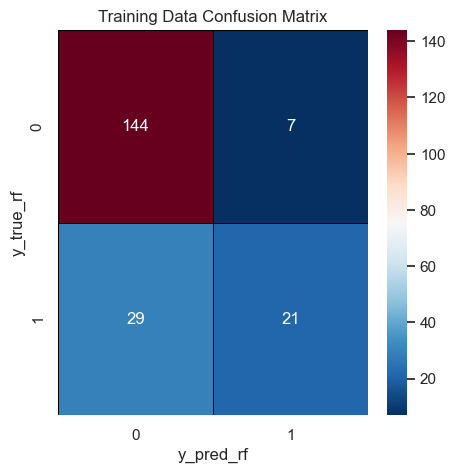

__________________________________________________
--------------------------------------------------
Results for: SVC
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       151
           1       1.00      0.06      0.11        50

    accuracy                           0.77       201
   macro avg       0.88      0.53      0.49       201
weighted avg       0.82      0.77      0.68       201

Training Recall: 1.0
Training Precision: 0.7626
Training F1-score: 0.8653


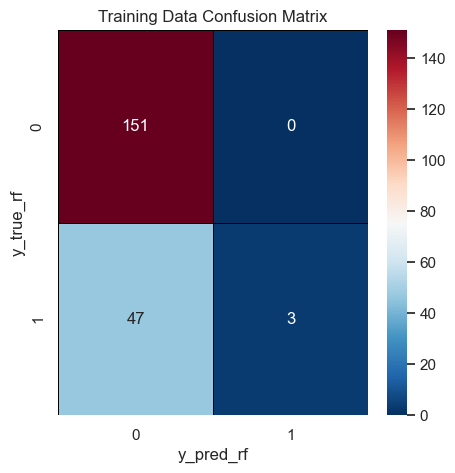

__________________________________________________
--------------------------------------------------
Results for: MLPClassifier
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       151
           1       0.77      0.20      0.32        50

    accuracy                           0.79       201
   macro avg       0.78      0.59      0.60       201
weighted avg       0.78      0.79      0.73       201

Training Recall: 0.9801
Training Precision: 0.7872
Training F1-score: 0.8732


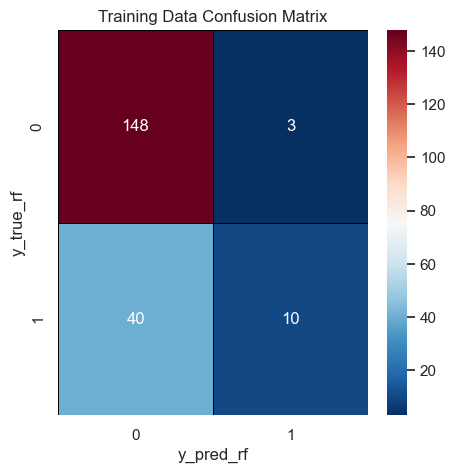

__________________________________________________
--------------------------------------------------
Results for: GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       151
           1       0.73      0.22      0.34        50

    accuracy                           0.79       201
   macro avg       0.76      0.60      0.61       201
weighted avg       0.78      0.79      0.74       201

Training Recall: 0.9735
Training Precision: 0.7903
Training F1-score: 0.8724


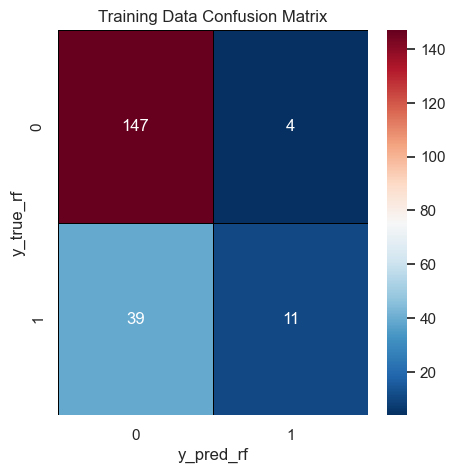

__________________________________________________
--------------------------------------------------
Results for: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


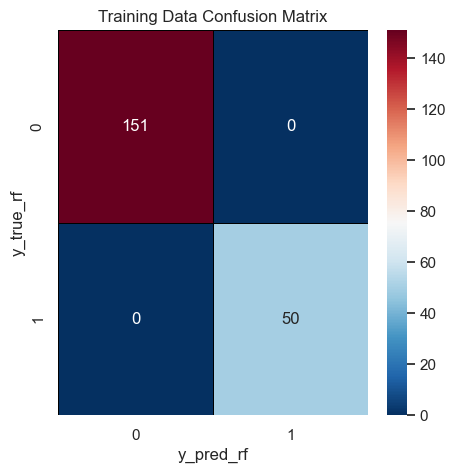

__________________________________________________
--------------------------------------------------
Results for: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        50

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Training Recall: 1.0
Training Precision: 1.0
Training F1-score: 1.0


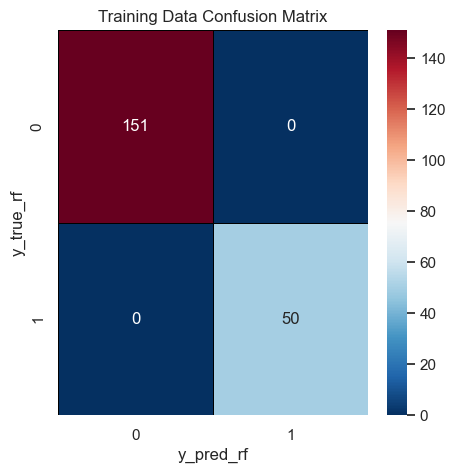

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.878300,0.888900,0.865300,0.873200,0.872400,1.000000,1.000000


In [41]:
showResult(classifiers,x_train_tda,y_train['mortalité à un an'])

__________________________________________________
--------------------------------------------------
Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        38
           1       0.50      0.23      0.32        13

    accuracy                           0.75        51
   macro avg       0.64      0.58      0.58        51
weighted avg       0.71      0.75      0.71        51

Testing Recall: 0.9211
Testing Precision: 0.7778
Testing F1-score: 0.8434


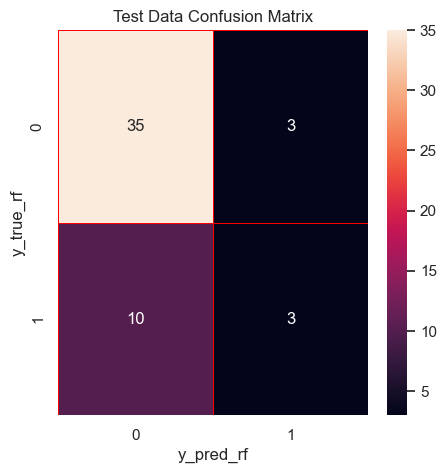

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.38      0.77      0.51        13

    accuracy                           0.63        51
   macro avg       0.63      0.67      0.61        51
weighted avg       0.75      0.63      0.65        51

Testing Recall: 0.5789
Testing Precision: 0.88
Testing F1-score: 0.6984


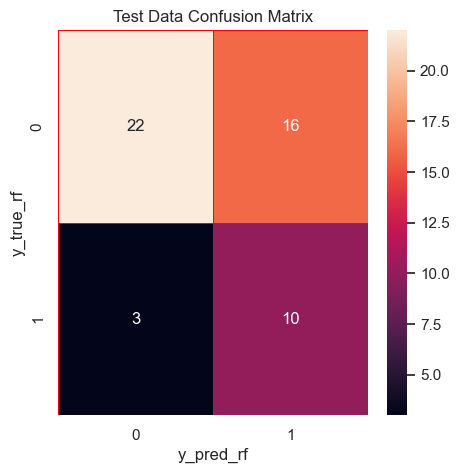

__________________________________________________
--------------------------------------------------
Results for SVC:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.15      0.27        13

    accuracy                           0.78        51
   macro avg       0.89      0.58      0.57        51
weighted avg       0.83      0.78      0.72        51

Testing Recall: 1.0
Testing Precision: 0.7755
Testing F1-score: 0.8736


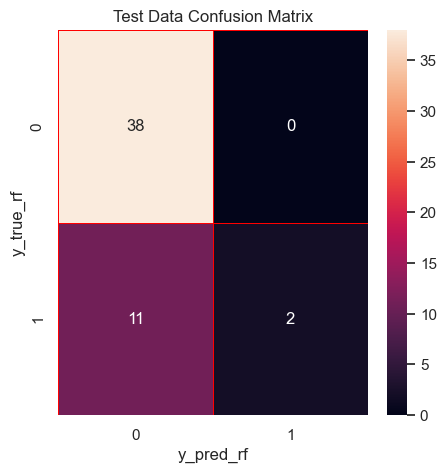

__________________________________________________
--------------------------------------------------
Results for MLPClassifier:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.15      0.27        13

    accuracy                           0.78        51
   macro avg       0.89      0.58      0.57        51
weighted avg       0.83      0.78      0.72        51

Testing Recall: 1.0
Testing Precision: 0.7755
Testing F1-score: 0.8736


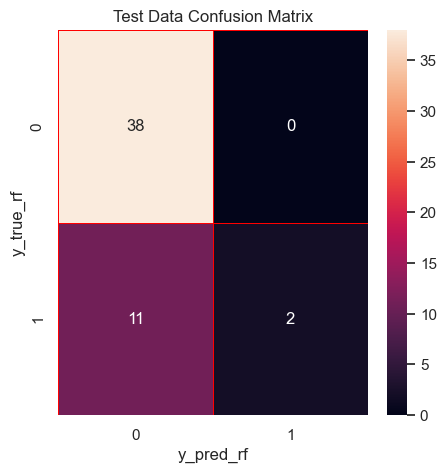

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        38
           1       0.25      0.54      0.34        13

    accuracy                           0.47        51
   macro avg       0.49      0.49      0.45        51
weighted avg       0.61      0.47      0.50        51

Testing Recall: 0.4474
Testing Precision: 0.7391
Testing F1-score: 0.5574


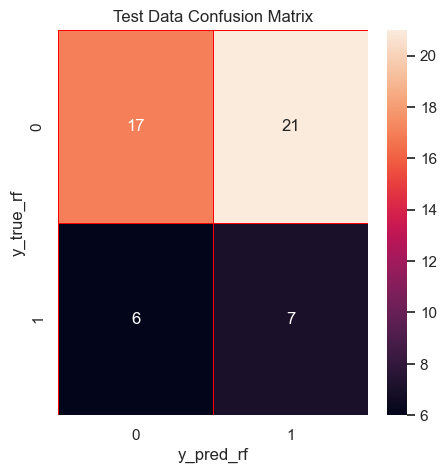

__________________________________________________
--------------------------------------------------
Results for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.40      0.46      0.43        13

    accuracy                           0.69        51
   macro avg       0.60      0.61      0.61        51
weighted avg       0.70      0.69      0.69        51

Testing Recall: 0.7632
Testing Precision: 0.8056
Testing F1-score: 0.7838


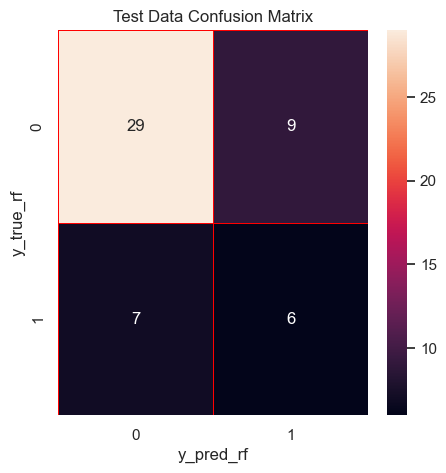

__________________________________________________
--------------------------------------------------
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.71      0.38      0.50        13

    accuracy                           0.80        51
   macro avg       0.77      0.67      0.69        51
weighted avg       0.79      0.80      0.78        51

Testing Recall: 0.9474
Testing Precision: 0.8182
Testing F1-score: 0.878


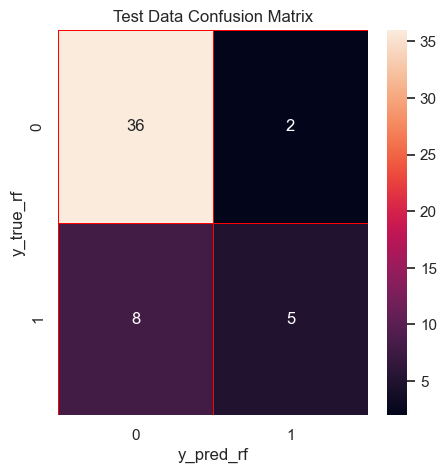

,LogisticRegression,KNeighborsClassifier,SVC,MLPClassifier,GaussianNB,DecisionTreeClassifier,RandomForestClassifier
0,0.843400,0.698400,0.873600,0.873600,0.557400,0.783800,0.878000


In [42]:
showResult(classifiers,x_train_tda,y_train['mortalité à un an'],test=[x_test_tda,y_test['mortalité à un an']])

__________________________________________________
--------------------------------------------------
Results for GaussianNB:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56        38
           1       0.25      0.54      0.34        13

    accuracy                           0.47        51
   macro avg       0.49      0.49      0.45        51
weighted avg       0.61      0.47      0.50        51

Testing Recall: 0.4474
Testing Precision: 0.7391
Testing F1-score: 0.5574


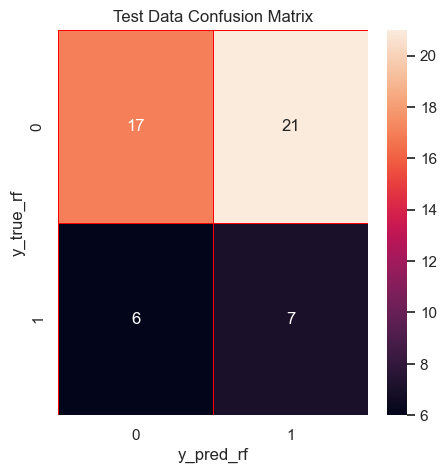

,GaussianNB
0,0.557400


In [43]:
showResult([GaussianNB],x_train_tda,y_train['mortalité à un an'],test=[x_test_tda,y_test['mortalité à un an']])

The modeles that perform best are: KNeighborsClassifier with 89.37, RandomForestClassifier 88.89 and GausianNB but it turns to overfits

### Tunning KNeighborsClassifier

__________________________________________________
--------------------------------------------------
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.83      0.38      0.53        13

    accuracy                           0.82        51
   macro avg       0.83      0.68      0.71        51
weighted avg       0.83      0.82      0.80        51

Testing Recall: 0.9737
Testing Precision: 0.8222
Testing F1-score: 0.8916


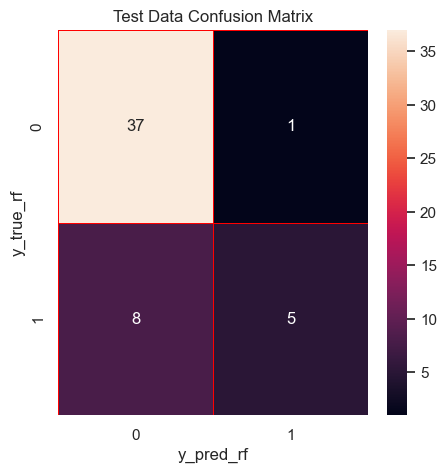

,KNeighborsClassifier
0,0.891600


In [16]:
showResult([KNeighborsClassifier],x_train_tda,y_train["mortalité à un an"],test=[x_test_tda,y_test["mortalité à un an"]])

In [17]:
rdf_param = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Create a Decision Tree Classifier
clf = RandomForestClassifier()

**************************************************
RandomForestClassifier(max_depth=5, max_features='log2')
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7247619047619047
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       151
           1       0.95      0.42      0.58        50

    accuracy                           0.85       201
   macro avg       0.90      0.71      0.75       201
weighted avg       0.87      0.85      0.83       201

Training Recall: 0.9934
Training Precision: 0.838
Training F1-score: 0.9091


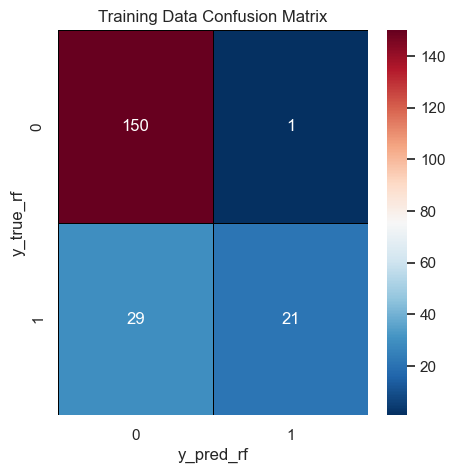

**************************************************
RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50)
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.38
Method
RandomForestClassifier
Results for Accuracy Optimized RandomForestClassifier GSCV
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       151
           1       0.82      0.46      0.59        50

    accuracy                           0.84       201
   macro avg       0.83      0.71      0.75       201
weighted avg       0.84      0.84      0.82       201

Training Recall: 0.9669
Training Precision: 0.8439
Training F1-score: 0.9012


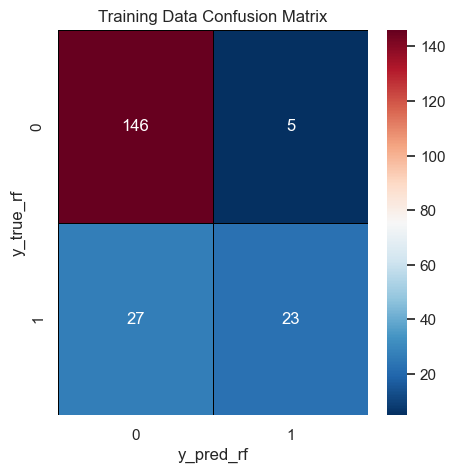

In [18]:
print("*"*50)
rfc_gscv_precision,y_pred_precision=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='precision')
print("*"*50)
rfc_gscv_recall,y_pred_recall=modelTunning(rdf_param,x_train_tda,y_train["mortalité à un an"],clf,scoring='recall')

In [19]:
best_threshold(rfc_gscv_micro,x_train_tda,y_train.iloc[:, -2])

NameError: name 'rfc_gscv_micro' is not defined

In [ ]:
my_thresh = 0.4

y_pred_test_thresh = (rfc_gscv_micro.predict_proba(x_test_tda)[:,1] >= my_thresh).astype(bool)
y_pred = rfc_gscv_micro.predict(x_test_tda)

final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred_test_thresh,rfc_gscv_micro, title="RandomForestclassifier Accuracy Optimized Model")
final_log=classification_results(x_test_tda,y_test["mortalité à un an"],y_pred,rfc_gscv_micro, title="RandomForestclassifier Accuracy Optimized Model")


# PCA + TDA + reinforcement

In [ ]:
# TDA + classifier+ reinforcement
# preservation de tda pour la metric x, tu gagne de la valeur , sinon tu perd de la valeur
# recompensr la machine, avec une valeur de perte, ou separation entre les different bloc de la machine avec
#les differents block neuronal
# pip install gym

#taelcore + machine

PCA + machine


Taelcore + machine

PCA + TDA + machine


PCA + TDA + reinforcement

PCA + TDA + reinforcement comparer avec Taelcore + machine

In [ ]:
#pip install tf-agents
#pip install tensorflow

In [ ]:
import tensorflow as tf
from tf_agents.specs import TensorSpec

# Define your custom observation space using TensorSpec
observation_shape = (3, 3)  # Example: 3x3 grid
observation_dtype = tf.float32  # Example data type

observation_spec = TensorSpec(shape=observation_shape, dtype=observation_dtype,name="observation")

# Print the observation space specification
print(observation_spec)


In [ ]:
import tensorflow as tf
from tf_agents.specs import TensorSpec

# Define the shape and data type of the binary observation space
batch_size = 32  # Example batch size
observation_dim = 10  # Example number of binary features

# Define the custom observation space using TensorSpec
observation_shape = (batch_size, observation_dim)
observation_dtype = tf.int32  # Assuming binary values are represented as integers (0 or 1)

observation_spec = TensorSpec(shape=observation_shape, dtype=observation_dtype)

# Print the observation space specification
print(observation_spec)


In [ ]:
class CardGameEnv(py_environment.PyEnvironment):

  def __init__(self):
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), dtype=np.int32, minimum=0, maximum=1, name='action')
    self._observation_spec = array_spec.BoundedArraySpec(
        shape=(1,), dtype=np.int32, minimum=0, name='observation')
    self._state = 0
    self._episode_ended = False

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec

  def _reset(self):
    self._state = 0
    self._episode_ended = False
    return ts.restart(np.array([self._state], dtype=np.int32))

  def _step(self, action):

    if self._episode_ended:
      # The last action ended the episode. Ignore the current action and start
      # a new episode.
      return self.reset()

    # Make sure episodes don't go on forever.
    if action == 1:
      self._episode_ended = True
    elif action == 0:
      new_card = np.random.randint(1, 11)
      self._state += new_card
    else:
      raise ValueError('`action` should be 0 or 1.')

    if self._episode_ended or self._state >= 21:
      reward = self._state - 21 if self._state <= 21 else -21
      return ts.termination(np.array([self._state], dtype=np.int32), reward)
    else:
      return ts.transition(
          np.array([self._state], dtype=np.int32), reward=0.0, discount=1.0)

In [ ]:
from tf_agents.environments import py_environment

class CardGameEnv(py_environment.PyEnvironment):

  def __init__(self):
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), dtype=np.int32, minimum=0, maximum=1, name='action')
    self._observation_spec = array_spec.BoundedArraySpec(
        shape=(1,), dtype=np.int32, minimum=0, name='observation')
    self._state = 0
    self._episode_ended = False

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec

  def _reset(self):
    self._state = 0
    self._episode_ended = False
    return ts.restart(np.array([self._state], dtype=np.int32))

  def _step(self, action):

    if self._episode_ended:
      # The last action ended the episode. Ignore the current action and start
      # a new episode.
      return self.reset()

    # Make sure episodes don't go on forever.
    if action == 1:
      self._episode_ended = True
    elif action == 0:
      new_card = np.random.randint(1, 11)
      self._state += new_card
    else:
      raise ValueError('`action` should be 0 or 1.')

    if self._episode_ended or self._state >= 21:
      reward = self._state - 21 if self._state <= 21 else -21
      return ts.termination(np.array([self._state], dtype=np.int32), reward)
    else:
      return ts.transition(
          np.array([self._state], dtype=np.int32), reward=0.0, discount=1.0)

In [ ]:
class TDAEnv(py_environment.PyEnvironment):

  def __init__(self):
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), dtype=np.int32, minimum=0, maximum=1, name='action')
    self._observation_spec = array_spec.BoundedArraySpec(
        shape=(1,), dtype=np.int32, minimum=0, name='observation')
    self._state = 0
    self._episode_ended = False

  def action_spec(self):
    return self._action_spec

  def observation_spec(self):
    return self._observation_spec

  def _reset(self):
    self._state = 0
    self._episode_ended = False
    return ts.restart(np.array([self._state], dtype=np.int32))

  def _step(self, action):

    if self._episode_ended:
      # The last action ended the episode. Ignore the current action and start
      # a new episode.
      return self.reset()

    # Make sure episodes don't go on forever.
    if action == 1:
      self._episode_ended = True
    elif action == 0:
        #here call each epoch of the learning algorithm
      new_card = np.random.randint(1, 11)
        #increasing the state by 1, which is our observation because we are making 
        #sure that the epoch should  ot be greater than a certain value
      self._state += 1
    else:
      raise ValueError('`action` should be 0 or 1.')

    #the state here precise the number of epochs
    if self._episode_ended or self._state >= 21:
      reward = self._state - 21 if self._state <= 21 else -21
      return ts.termination(np.array([self._state], dtype=np.int32), reward)
    else:
      return ts.transition(
          np.array([self._state], dtype=np.int32), reward=0.0, discount=1.0)

In [ ]:
import numpy as np
np.random.randint(1, 11)